# Testing Environment

# From last notebook:

# END

In [1]:
# Standard imports
# If any of these don't work, try doing `pip install _____`, or try looking up the error message.
import numpy as np
import pandas as pd
import json
import time
import os.path
from os import path
import math
import datetime
import unidecode
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split

In [2]:
orig = pd.read_csv("data/player_data_final.csv")
orig.head()

,name,NCAAB_assists,NCAAB_blocks,NCAAB_field_goal_attempts,NCAAB_field_goal_percentage,NCAAB_field_goals,NCAAB_free_throw_attempt_rate,NCAAB_free_throw_attempts,NCAAB_free_throw_percentage,NCAAB_free_throws,...,NCAAB_two_point_percentage,NCAAB_win_shares,NBA_assists,NBA_blocks,NBA_points,NBA_steals,NBA_total_rebounds,Center,Forward,Guard
0,Landry Fields,89.0,25.0,506.0,0.490,248.0,0.508,257.0,0.696,179.0,...,0.521,6.0,155.0,17.0,797.0,80.0,521.0,0,0,1
1,Andy Rautins,171.0,8.0,297.0,0.438,130.0,0.273,81.0,0.815,66.0,...,0.571,4.9,3.0,0.0,8.0,1.0,1.0,0,0,1
2,Patrick Patterson,36.0,51.0,374.0,0.575,215.0,0.348,130.0,0.692,90.0,...,0.626,7.0,41.0,37.0,328.0,17.0,200.0,0,1,0
3,Gani Lawal,15.0,49.0,325.0,0.529,172.0,0.683,222.0,0.572,127.0,...,0.531,4.1,0.0,0.0,0.0,0.0,0.0,0,1,0
4,Cole Aldrich,31.0,125.0,265.0,0.562,149.0,0.600,159.0,0.679,108.0,...,0.562,5.9,4.0,7.0,18.0,5.0,35.0,1,0,0


# SUSA

In [3]:
# Load data
mpg = pd.read_csv("./data/mpg.csv", index_col="name") 

# Remove rows that have missing horsepower
mpg = mpg.loc[mpg["horsepower"] != '?'].astype(int) 

# Train, test split
mpg_train, mpg_test = train_test_split(mpg, 
                                       test_size = .2, 
                                       random_state = 0) 

# Train, validation split
mpg_train, mpg_validation = train_test_split(mpg_train, 
                                             test_size = .25, 
                                             random_state = 0)

# Notice that the splitting above creates a 60/20/20 split
mpg_train.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
plymouth satellite sebring,18,6,225,105,3613,16,74,1
vw rabbit,29,4,90,70,1937,14,76,2
dodge coronet custom,15,8,318,150,3777,12,73,1
plymouth reliant,27,4,135,84,2490,15,81,1
vw rabbit c (diesel),44,4,90,48,2085,21,80,2


In [4]:
mpg_train_with_intercept = mpg_train.copy()

# Add intercept term to training set
mpg_train_with_intercept.insert(1, "intercept", np.ones(mpg_train.shape[0]))

# Obtain our data matrix X and response vector y
X_train = np.asmatrix(mpg_train_with_intercept.iloc[:, 1:])
y_train = np.array(mpg_train.iloc[:, 0])

print(X_train.shape)
print(y_train.shape)

(234, 8)
(234,)


In [5]:
beta_hat_ols = np.linalg.inv(np.transpose(X_train) @ X_train) @ np.transpose(X_train) @ y_train

In [6]:
beta_hat_ols = beta_hat_ols.reshape(8, 1)
beta_hat_ols = np.asarray(beta_hat_ols).flatten()
beta_hat_ols

array([-1.44002965e+01, -1.89305414e-01,  2.00332299e-02, -6.73219101e-03,
       -7.87176662e-03,  2.35769833e-01,  7.10375016e-01,  8.97463586e-01])

In [7]:
mpg_train.shape

(234, 8)

In [8]:
mpg_train.iloc[:, 1:].shape

(234, 7)

In [9]:
from sklearn.linear_model import LinearRegression

# Initialize a linear model
# I set the fit intercept to true so that the coefficients match
linear_model = LinearRegression(fit_intercept=True)

# Fit linear model
X_train = np.asmatrix(mpg_train.iloc[:, 1:])

In [10]:
linear_model = linear_model.fit(X_train, y_train)

beta_hat_sklearn = np.append(np.array(linear_model.intercept_),linear_model.coef_)
beta_hat_sklearn

array([-1.44002965e+01, -1.89305414e-01,  2.00332299e-02, -6.73219101e-03,
       -7.87176662e-03,  2.35769833e-01,  7.10375016e-01,  8.97463586e-01])

# Work-Stuff 3/14

In [11]:
def normalize_and_return(df):
    """
    Normalize the columns and return the different parameters to denormalize.
    """
    sc_objs = {}
    for col in df.columns:
        sc = StandardScaler()
        if col in nba_col:
            sc.fit_transform(clean_data[[col]])
            sc_objs[col] = sc
        clean_data[col] = sc.fit_transform(clean_data[[col]])
    return sc_objs

In [12]:
# Takes advantage of Pandas's apply method
class Denormalize():
    """
    Stores variables to denormalize the different normalized columns later.
    """
    def __init__(self):
        self.means = []
        self.stds = []
        
    def add_col(self, col):
        self.means.append((col.name, np.mean(col)))
        self.stds.append((col.name, np.std(col)))
    
    # These are needed because the .apply method calls the function on the first column twice.
    def real_vals(self):
        self.means.pop(0)
        self.stds.pop(0)
        return self.means, self.stds

In [13]:
def normalize_and_return(col, obj):
    """
    Calls normalize on the dataframe but also returns the different parameters to un-normalize later.
    """
    
    def normalize(col):
        """
        Normalizes a column to have a mean of 0 and an standard deviation of 1.
        """
        return (col - col.mean()) / col.std()
    
    obj.add_col(col)
    return normalize(col)

In [14]:
NBA_cols = ['NBA_assists', 'NBA_blocks', 'NBA_points', 'NBA_steals', 'NBA_total_rebounds']

In [15]:
denorm_feats = Denormalize()

In [16]:
orig_X_train = orig.drop(columns=NBA_cols).set_index('name')
X_train = orig_X_train.apply(lambda x: normalize_and_return(x, denorm_feats))

In [17]:
feat_means, feat_stds = denorm_feats.real_vals()

In [18]:
orig_y_train = orig[NBA_cols]
denorm_y = Denormalize()
y_train = orig_y_train.apply(lambda x: normalize_and_return(x, denorm_y))
y_means, y_stds = denorm_y.real_vals()

In [19]:
# Let's see how our data looks, see if we can guess how good Linear Regression is going to be!

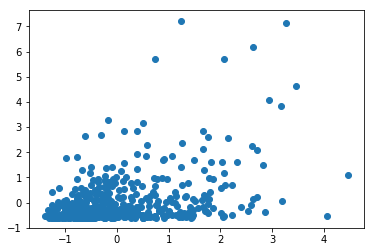

In [20]:
plt.scatter(X_train['NCAAB_assists'], y_train['NBA_assists']);

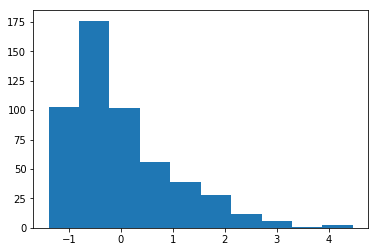

In [21]:
plt.hist(X_train['NCAAB_assists']);

### Analytical Solution

In [22]:
curr_pred = 'NBA_points'

In [23]:
old_X_train = X_train.copy(deep=True)

In [24]:
X_train.insert(0, "intercept", np.ones(X_train.shape[0]))

In [25]:
weights = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train[curr_pred].values

In [26]:
preds = X_train @ weights.values

In [31]:
y_mean = [tup[1] for tup in y_means if tup[0] == curr_pred]
y_std = [tup[1] for tup in y_stds if tup[0] == curr_pred]

In [33]:
raw_preds = preds * y_std + y_mean

In [38]:
list(raw_preds.index)

['Landry Fields',
 'Andy Rautins',
 'Patrick Patterson',
 'Gani Lawal',
 'Cole Aldrich',
 'Jeremy Lin',
 'Ekpe Udoh',
 'Dexter Pittman',
 'Derrick Caracter',
 'Devin Ebanks',
 'Lazar Hayward',
 'Dominique Jones',
 'Xavier Henry',
 'Greivis Vásquez',
 'Paul George',
 'Lance Stephenson',
 'Jeremy Evans',
 'Derrick Favors',
 'Gordon Hayward',
 'DeMarcus Cousins',
 'Hassan Whiteside',
 'Solomon Alabi',
 'Ed Davis',
 'Craig Brackins',
 'Evan Turner',
 'Al-Farouq Aminu',
 'Eric Bledsoe',
 'Willie Warren',
 'Trevor Booker',
 'Jordan Crawford',
 'John Wall',
 'Greg Monroe',
 'Avery Bradley',
 'Luke Harangody',
 'Luke Babbitt',
 'Armon Johnson',
 'Manny Harris',
 'Samardo Samuels',
 'Quincy Pondexter',
 'Damion James',
 'Ben Uzoh',
 'Sherron Collins',
 'Larry Sanders',
 'Kenneth Faried',
 'Julyan Stone',
 'Cory Joseph',
 'Kawhi Leonard',
 'Malcolm Thomas',
 'Reggie Jackson',
 'Ryan Reid',
 'Alec Burks',
 'Tobias Harris',
 'Darington Hobson',
 'Jon Leuer',
 'Jimmer Fredette',
 'Tyler Honeycutt',

In [54]:
import time

In [61]:
while True:
    name = input("Who would you like to search for today? ")
    print("Calculating...")
    time.sleep(1)
    try:
        print("{} is projected to get".format(name), round(raw_preds[name] / 82, 2), "pts. per game over 82 games.")
    except KeyError:
        print("Sorry! I can't find {} at the time. Please try correct capitalization/spelling, or try a different, more recent player.".format(name))

Who would you like to search for today? Kemba Walker
Calculating...
Kemba Walker is projected to get 6.82 pts. per game over 82 games.
Who would you like to search for today? Joel Embiid
Calculating...
Joel Embiid is projected to get 3.67 pts. per game over 82 games.
Who would you like to search for today? Trae Young
Calculating...
Trae Young is projected to get 8.52 pts. per game over 82 games.


KeyboardInterrupt: 

In [43]:
name = 'Kemba Walker'

In [48]:
raw_preds.index[np.argmax(raw_preds)], raw_preds[np.argmax(raw_preds)]

('Trae Young', 699.0208880157741)

In [50]:
raw_preds[np.argmax(raw_preds)] / 82

8.524644975802122

In [ ]:
for i in range(len(X_train.columns)):
    print((i, X_train.columns[i], weights[i]))

## Prove Analytical = Sklearn

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear_model = LinearRegression(fit_intercept=True).fit(old_X_train, y_train.NBA_points.values)

In [ ]:
pd.Series(np.append(linear_model.intercept_, linear_model.coef_))

In [ ]:
linear_model.score(old_X_train, y_train.NBA_points.values)

In [ ]:
weights

In [ ]:
name = 'Jared Sullinger'

In [ ]:
pred_points = linear_model.predict(test_x.loc[name].values.reshape(1, -1))

In [ ]:
orig_person = orig[orig['name'] == name]
orig_person

In [ ]:
print("We predict", name, "should get around", (pred_points * np.std(orig['NBA_points']) + np.mean(orig['NBA_points']))[0] / 82, "points. They actually got", float(orig_person.NBA_points / 45))

In [ ]:
orig[orig['name'] == name].NBA_points

In [ ]:
sc2.inverse_transform(test_y['NBA_points'])

In [ ]:
for col in nba_cols:
    pred_stat = train_y[col]
    col_name = col[4:]
    reg = LinearRegression().fit(train_x.values, train_y.NBAPTS.values)

In [ ]:
clean_data.tail()

In [ ]:
reg = LinearRegression().fit(train_x.values, train_y.NBAPTS.values)

In [ ]:
weights

# Subset of Feature Selection

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
clean_reduce.head()

In [ ]:
clean_reduce.columns

In [ ]:
clean_data = clean_reduce.to_csv("data/clean_player_data.csv")

In [ ]:
train = clean_reduce.iloc[:, 5:]
train.head()

In [ ]:
pca = PCA(n_components=7)
pca_fitted = pca.fit_transform(train.values)

In [ ]:
print("Ratios:", list(pca.explained_variance_ratio_))
print("Total explained by components:", sum(pca.explained_variance_ratio_))

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
k_means_cluster = KMeans(n_clusters=120, max_iter=10000, n_init=100).fit(train.values)
k_means_cluster

In [ ]:
def plot_cluster(data, labels):
    plt.figure(figsize=(18, 9))
    plt.scatter(data[:, 0], data[:, 1], color=plt.cm.Set1(np.true_divide(np.array(labels), max(labels))))

In [ ]:
# plot_cluster(pca_fitted, k_means_cluster.labels_)

In [ ]:
# Let's test how it did!
player = 'Trae Young'

In [ ]:
train['label'] = k_means_cluster.labels_
train.head()

In [ ]:
player_label = train.loc[player].label
player_label

In [ ]:
similar = train[train.label == player_label]
similar.drop(index=player, inplace=True) # Don't want to take player's actual results in prediction
similar

# inverse_transform

In [ ]:
nba_data = clean_data.iloc[:, nba_important]
nba_data['NBA_games_played'] = clean_data['NBA_games_played'] # Adding number of games played, but not in the modelling training component yet
nba_data['Guard'] = clean_data['Guard'] # Adding positions for curiousity
nba_data['Forward'] = clean_data['Forward'] # Adding positions for curiousity
nba_data['Center'] = clean_data['Center'] # Adding positions for curiousity
similar_nba = nba_data.loc[similar.index]
similar_nba

In [ ]:
avg = similar_nba.mean()
avg_stats = avg[:5] / avg[5]
season_stats = pd.concat((avg_stats, pd.Series({'NBA_games_played': avg[5]}))).round(2)
season_stats

In [ ]:
print "We predict that", player, "will average", str(season_stats['NBA_points']), "points,", str(season_stats['NBA_total_rebounds']), "rebounds,", str(season_stats['NBA_assists']), "assists,", str(season_stats['NBA_steals']), "steals,", str(season_stats['NBA_blocks']), "blocks per game, and play in", int(season_stats['NBA_games_played']), "games in his rookie season."


### Boom

Now that we've been able to select which features might be useful for our

# Original In Notebook

In [ ]:
clean_data = orig.copy(deep=True)

In [ ]:
clean_data.set_index('name', inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
nba_col = ['NBA_assists', 'NBA_blocks', 'NBA_points', 'NBA_steals', 'NBA_total_rebounds']
nba_col

In [ ]:
no_nba = clean_data.drop(columns=nba_col)

sc_objs = {}
for col in clean_data.columns:
    sc = StandardScaler()
    if col in nba_col:
        sc.fit_transform(clean_data[[col]])
        sc_objs[col] = sc
    clean_data[col] = sc.fit_transform(clean_data[[col]])

In [ ]:
train, test = train_test_split(clean_data, train_size=0.8)

In [ ]:
train_x = train.drop(columns=nba_col)
train_y = train[nba_col]

In [ ]:
test_x = test.drop(columns=nba_col)
test_y = test[nba_col]

In [ ]:
list(test_y.index)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear_model = LinearRegression().fit(train_x, train_y.NBA_points.values)

In [ ]:
name = 'Jared Sullinger'

In [ ]:
pred_points = linear_model.predict(test_x.loc[name].values.reshape(1, -1))

In [ ]:
orig_person = orig[orig['name'] == name]
orig_person

In [ ]:
print("We predict", name, "should get around", (pred_points * np.std(orig['NBA_points']) + np.mean(orig['NBA_points']))[0] / 82, "points. They actually got", float(orig_person.NBA_points / 45))

In [ ]:
orig[orig['name'] == name].NBA_points

In [ ]:
sc2.inverse_transform(test_y['NBA_points'])

In [ ]:
for col in nba_cols:
    pred_stat = train_y[col]
    col_name = col[4:]
    reg = LinearRegression().fit(train_x.values, train_y.NBAPTS.values)

In [ ]:
clean_data.tail()

In [ ]:
reg = LinearRegression().fit(train_x.values, train_y.NBAPTS.values)